# **1**. **Uploading original dataset**

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving animals lifespan.csv to animals lifespan.csv


In [ ]:
import pandas as pd
# Load the CSV file
data = pd.read_csv("animals lifespan.csv")

# 2. PREPROCESSING THE DATASET




In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
data = pd.read_csv('animals lifespan.csv')

# Correct spelling mistakes
data['animal category'] = data['animal category'].str.replace('mamal', 'mammal', regex=False)
data['animal category'] = data['animal category'].str.replace('invertabrates', 'invertebrates', regex=False)
data['eggs or babys'] = data['eggs or babys'].str.replace('babys', 'babies', regex=False)
data['eggs or babys'] = data['eggs or babys'].str.replace('baby', 'babies', regex=False)

# Rename the column
data.rename(columns={'eggs or babys': 'eggs or babies'}, inplace=True)

# Handle missing values
data['average male weight in kg'].fillna(data['average male weight in kg'].mean(), inplace=True)
data['average female weight in kg'].fillna(data['average female weight in kg'].mean(), inplace=True)
data['average lifespan in years'].fillna(data['average lifespan in years'].mean(), inplace=True)

# Combine 'living environment' and 'living place' into 'living_place'
def consolidate_living_place(row):
    env = row['living enviroment']
    place = row['living place']

    if 'land' in place.lower():
        if 'water' in place.lower() or 'ponds' in env.lower() or 'ocean' in env.lower() or 'lagoons' in env.lower():
            if 'air' in place.lower():
                return 'land-water-air'
            return 'land-water'
        if 'air' in place.lower():
            return 'land-air'
        return 'land'
    elif 'water' in place.lower() or 'ponds' in env.lower() or 'ocean' in env.lower() or 'lagoons' in env.lower():
        return 'water'
    elif 'air' in place.lower():
        return 'air'
    return 'land'  # default

data['living_place'] = data.apply(consolidate_living_place, axis=1)

# Drop the original columns
data = data.drop(columns=['living enviroment', 'living place'])

# Convert categorical variables to numerical values using one-hot encoding
categorical_columns = ['animal category', 'living_place', 'eggs or babies', 'domestic or wild']
data = pd.get_dummies(data, columns=categorical_columns, dtype=int)

#Scale Numerical Features
# Handle numerical values: Scale numerical features using MinMaxScaler
numerical_columns = ['average male weight in kg', 'average female weight in kg']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the preprocessed data
print(data.head())

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_animals_lifespan.csv', index=False)

  animal name  average male weight in kg  average female weight in kg  \
0        cows                   0.011000                     0.005882   
1     chicken                   0.022671                     0.000026   
2       sheep                   0.000670                     0.000559   
3         pig                   0.002000                     0.000919   
4        duck                   0.000012                     0.000009   

   average lifespan in years  animal category_bird  animal category_fish  \
0                       20.0                     0                     0   
1                        7.0                     1                     0   
2                       11.0                     0                     0   
3                       17.0                     0                     0   
4                        7.0                     1                     0   

   animal category_insect  animal category_invertebrates  \
0                       0                   

<ipython-input-4-4a340e99024b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['average male weight in kg'].fillna(data['average male weight in kg'].mean(), inplace=True)
<ipython-input-4-4a340e99024b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [ ]:
files.download("cleaned_animals_lifespan.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. USING THE PREPROCESSED DATASET

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving cleaned_animals_lifespan.csv to cleaned_animals_lifespan.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('/content/cleaned_animals_lifespan.csv')

# Drop rows with missing values
df = df.dropna() #removes the remaining dataset with NAN values

# Print the available columns to inspect for the correct name
print(df.columns)

# Features and target
X = df.drop(columns=['animal name', 'average lifespan in years'])
y = df['average lifespan in years']

# Scale the features for better k-NN behavior
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['animal name', 'average male weight in kg',
       'average female weight in kg', 'average lifespan in years',
       'animal category_bird', 'animal category_fish',
       'animal category_insect', 'animal category_invertebrates',
       'animal category_mammal', 'animal category_reptiles',
       'living_place_land', 'living_place_land-air',
       'living_place_land-water-air', 'living_place_water',
       'eggs or babies_babies', 'eggs or babies_can't reproduce',
       'eggs or babies_eggs', 'domestic or wild_domestic',
       'domestic or wild_wild'],
      dtype='object')


# 4. KNN Regression – MSE & RMSE (for all features and multiple k values) and PLOT for RMSE vs k

k = 1 | MSE: 0.0000 | RMSE: 0.0000
k = 5 | MSE: 127.3838 | RMSE: 11.2864
k = 10 | MSE: 279.1578 | RMSE: 16.7080
k = 20 | MSE: 317.2470 | RMSE: 17.8114


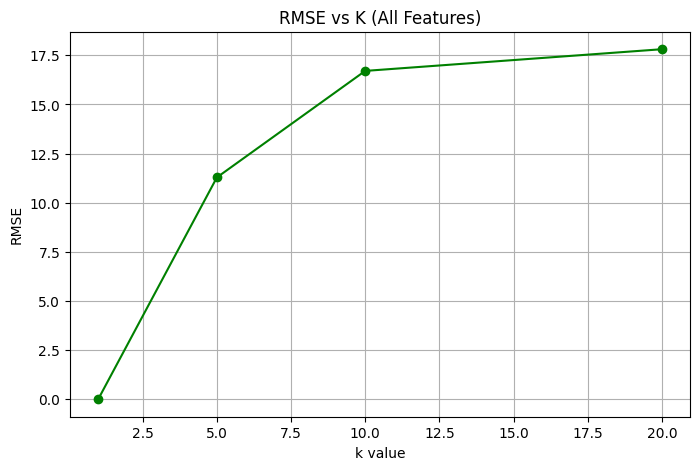

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

k_values = [1, 5, 10, 20]
mse_list = []
rmse_list = []
#train the model for each k
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    mse_list.append(mse) # strores all the values
    rmse_list.append(rmse)

    print(f"k = {k} | MSE: {mse:.4f} | RMSE: {rmse:.4f}")

# Plot MSE vs K

plt.figure(figsize=(8, 5))
plt.plot(k_values, rmse_list, marker='o', color='green')
plt.title('RMSE vs K (All Features)')
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# 5. PCA to Identify Dominant Features and plotting eigen values

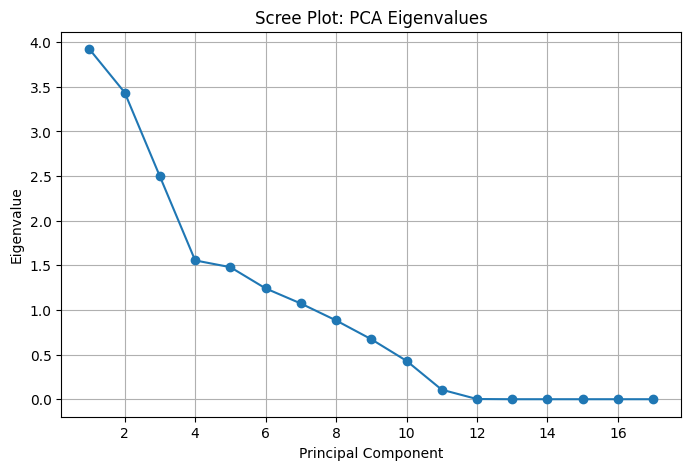

   Principal Component    Eigenvalue  Explained Variance Ratio  \
0                  PC1  3.921800e+00              2.267166e-01   
1                  PC2  3.436819e+00              1.986802e-01   
2                  PC3  2.495850e+00              1.442834e-01   
3                  PC4  1.555399e+00              8.991655e-02   
4                  PC5  1.479612e+00              8.553537e-02   
5                  PC6  1.241869e+00              7.179164e-02   
6                  PC7  1.072709e+00              6.201259e-02   
7                  PC8  8.829702e-01              5.104392e-02   
8                  PC9  6.722134e-01              3.886021e-02   
9                 PC10  4.301888e-01              2.486893e-02   
10                PC11  1.067400e-01              6.170566e-03   
11                PC12  2.075507e-03              1.199836e-04   
12                PC13  5.375643e-32              3.107623e-33   
13                PC14  3.246826e-32              1.876968e-33   
14        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare features
X = df.drop(columns=['average lifespan in years', 'animal name'])
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA
pca = PCA().fit(X_scaled)
eigenvalues, var_ratio, components = pca.explained_variance_, pca.explained_variance_ratio_, pca.components_
features = X.columns

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot: PCA Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# PCA Summary
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio': var_ratio
})

# Add feature loadings for each PC
for i, comp in enumerate(components):
    pca_summary[f'PC{i+1} Features'] = [f"{features[j]}: {comp[j]:.4f}" for j in range(len(comp))]

print(pca_summary.reset_index(drop=True))


# 6. For 2 dominant features and plotting RMSE vs K plot and 7 principle compoments plot

Top 2 dominant features based on PCA:
eggs or babies_babies     0.450778
animal category_mammal    0.415148
Name: 0, dtype: float64
[Top 2 PCA Features] k = 1 | RMSE: 0.0000
[Top 2 PCA Features] k = 5 | RMSE: 11.0651
[Top 2 PCA Features] k = 10 | RMSE: 16.7224
[Top 2 PCA Features] k = 20 | RMSE: 17.5830


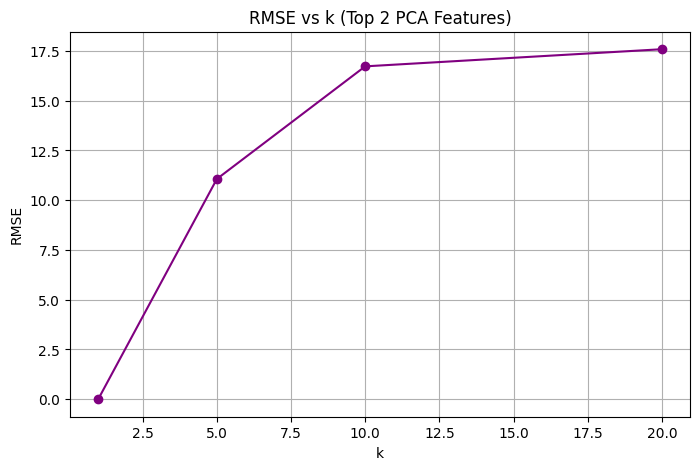

k = 1 | RMSE: 13.1463
k = 5 | RMSE: 14.7165
k = 10 | RMSE: 15.0082
k = 20 | RMSE: 14.9251


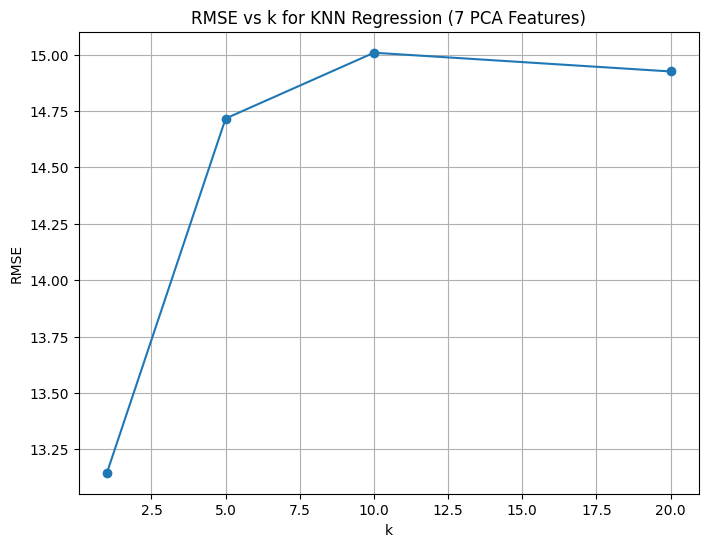

Target range: 0.008 100.0
Best params: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best RMSE: 10.80629081294983


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# --- Preprocess ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
y = df["average lifespan in years"]

# --- Top 2 Dominant Features from PC1 ---
components_df = pd.DataFrame(np.abs(pca.components_), columns=X.columns)
top2_features = components_df.iloc[0].sort_values(ascending=False).head(2)
print("Top 2 dominant features based on PCA:")
print(top2_features)

# --- KNN Regression on Top 2 PCA Components ---
X_top2_pca = X_pca[:, :2]
k_vals = [1, 5, 10, 20]
rmse_top2 = []

for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_top2_pca, y)
    rmse = np.sqrt(mean_squared_error(y, model.predict(X_top2_pca)))
    rmse_top2.append(rmse)
    print(f"[Top 2 PCA Features] k = {k} | RMSE: {rmse:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_vals, rmse_top2, marker='o', color='purple')
plt.title('RMSE vs k (Top 2 PCA Features)')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# --- KNN Regression on First 7 PCA Components ---
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :7], y, test_size=0.2, random_state=42)
rmse_7pc = []

for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    rmse_7pc.append(rmse)
    print(f"k = {k} | RMSE: {rmse:.4f}")

plt.figure(figsize=(8,6))
plt.plot(k_vals, rmse_7pc, marker='o')
plt.title('RMSE vs k for KNN Regression (7 PCA Features)')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

print("Target range:", y.min(), y.max())

# --- Grid Search for Best KNN Params ---
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)


# 7. COMPARASION OF ALL THREE APPROACHES

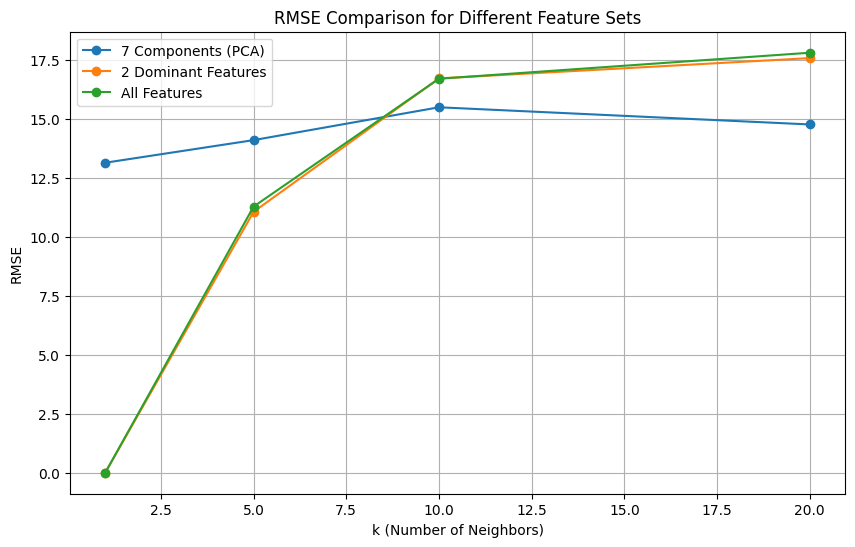

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RMSE values for each approach and k values
k_values = [1, 5, 10, 20]

# RMSE for each approach
rmse_7_components = [13.1463, 14.1050, 15.4976, 14.7696]
rmse_2_features = [0.0000, 11.0651, 16.7224, 17.5830]
rmse_all_features = [0.0000, 11.2864, 16.7080, 17.8114]

# Plot RMSE comparison
plt.figure(figsize=(10,6))
plt.plot(k_values, rmse_7_components, label='7 Components (PCA)', marker='o')
plt.plot(k_values, rmse_2_features, label='2 Dominant Features', marker='o')
plt.plot(k_values, rmse_all_features, label='All Features', marker='o')

# Adding labels and title
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Feature Sets')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# 8. DENSITY ESTIMATE FOR ALL THREE APPROACHES


--- PCA (7 Components) ---
Radius (r): 3.0359
Dimensions (d): 7
Volume V_d(r): 2377.0870
Density at x[0]: 7.2532e-05

--- 2 Dominant Features ---
Radius (r): 0.0826
Dimensions (d): 2
Volume V_d(r): 0.0068
Density at x[0]: 2.5281e+01

--- All Features ---
Radius (r): 3.6085
Dimensions (d): 17
Volume V_d(r): 2982986705.9041
Density at x[0]: 5.7799e-11


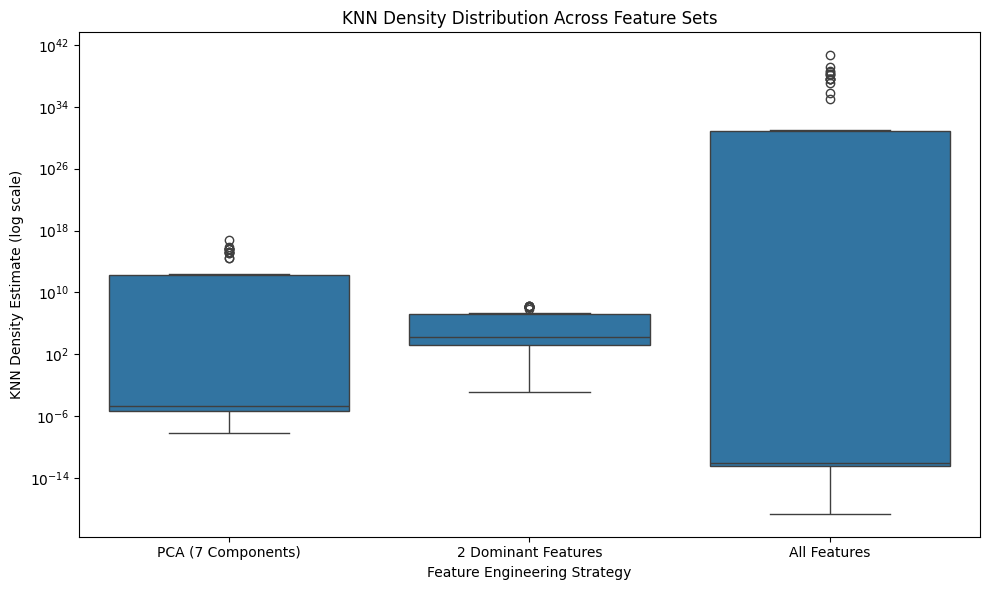

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Load & scale data
df = pd.read_csv("cleaned_animals_lifespan.csv")
X = StandardScaler().fit_transform(df.drop(columns=["animal name", "average lifespan in years"]))
n, k = len(X), 10

def knn_density(X_sub, label):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_sub)
    dists = nbrs.kneighbors(X_sub)[0][:, -1]
    dim = X_sub.shape[1]
    volume = np.power(dists, dim)
    density = k / (n * volume)

    # Print for first sample
    print(f"\n--- {label} ---")
    print(f"Radius (r): {dists[0]:.4f}")
    print(f"Dimensions (d): {dim}")
    print(f"Volume V_d(r): {volume[0]:.4f}")
    print(f"Density at x[0]: {density[0]:.4e}")

    return pd.DataFrame({"knn_density": density, "approach": label})

# Compute densities
df_all = pd.concat([
    knn_density(PCA(n_components=7).fit_transform(X), "PCA (7 Components)"),
    knn_density(X[:, :2], "2 Dominant Features"),
    knn_density(X, "All Features")
], ignore_index=True)

df_all.to_csv("knn_density_comparison.csv", index=False)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x="approach", y="knn_density")
plt.yscale("log")
plt.title("KNN Density Distribution Across Feature Sets")
plt.ylabel("KNN Density Estimate (log scale)")
plt.xlabel("Feature Engineering Strategy")
plt.tight_layout()
plt.show()
